<a href="https://colab.research.google.com/github/Yashmalhotra01/Fraud-detection-using-AI-ML-techniques-/blob/main/Yash1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for Fraud detection


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

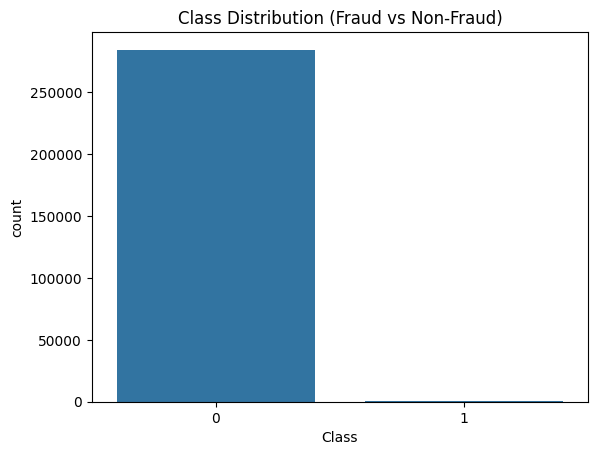

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro av

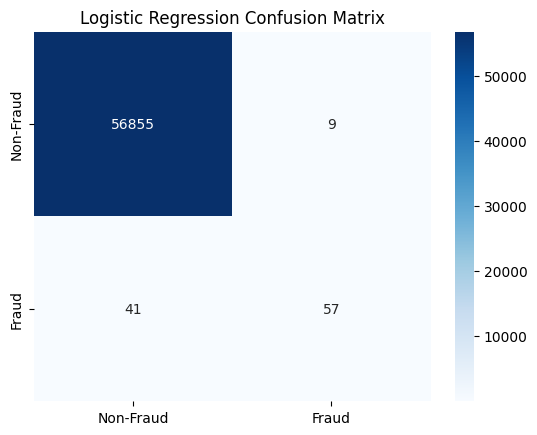

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree - ROC-AUC Score: 0.8977


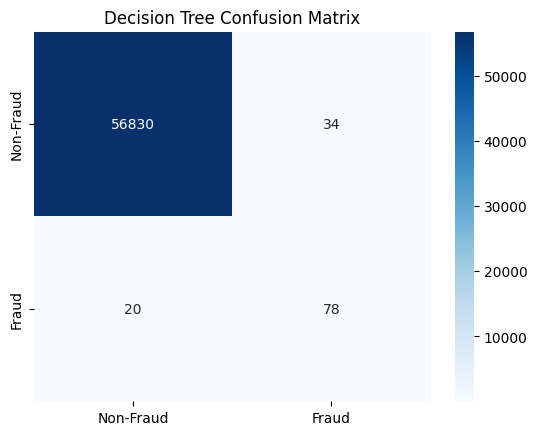

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest - ROC-AUC Score: 0.8826


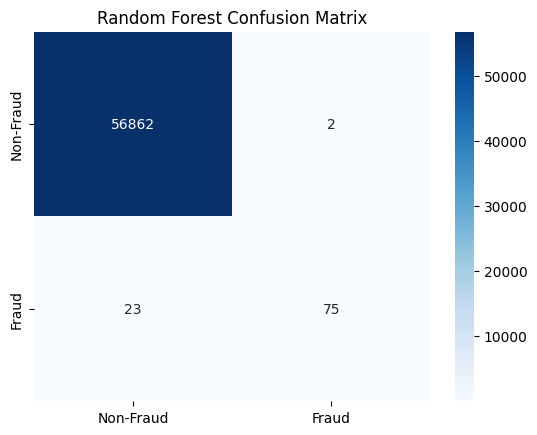

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost - ROC-AUC Score: 0.8877


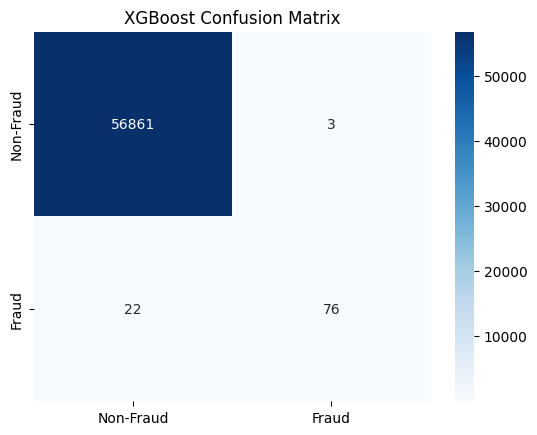

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.69      0.40        98

    accuracy                           1.00     56962
   macro avg       0.64      0.85      0.70     56962
weighted avg       1.00      1.00      1.00     56962

LightGBM - ROC-AUC Score: 0.8454


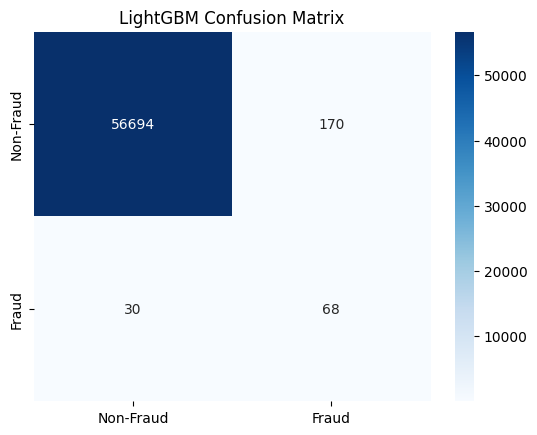

Isolation Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.63      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Isolation Forest - ROC-AUC Score: 0.8115


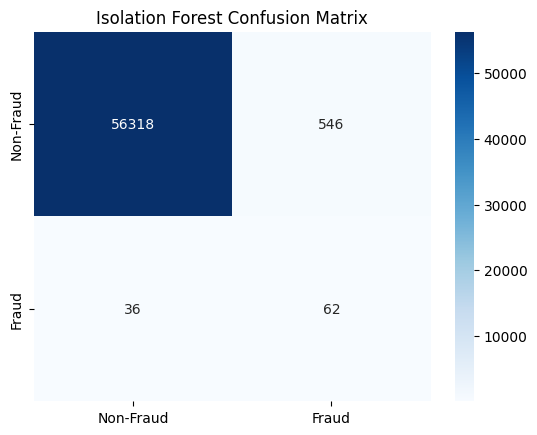

DBSCAN - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.04     56962

DBSCAN - ROC-AUC Score: 0.5102


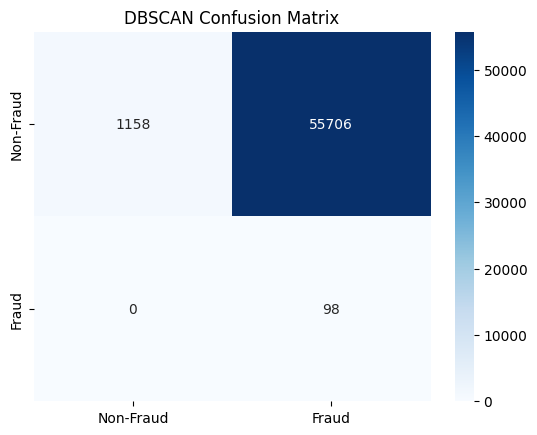

Autoencoder - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.87      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Autoencoder - ROC-AUC Score: 0.9094


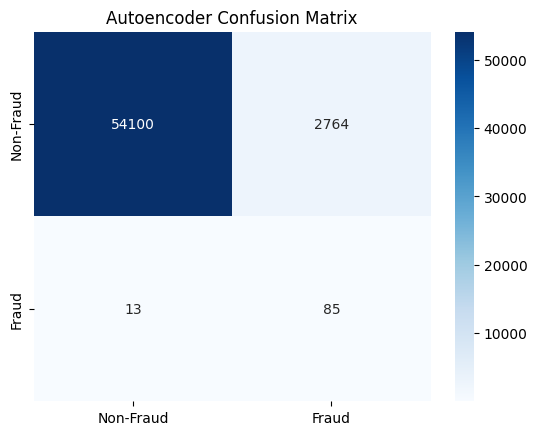

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
#from pyod.models.knn import KNN
!pip install pyod
from pyod.models.auto_encoder import AutoEncoder
from sklearn.impute import SimpleImputer
# Load the dataset (example: Kaggle Credit Card Fraud dataset)
df = pd.read_csv('/content/creditcard.csv')

# Check for missing values and data distribution
df.info()
df.isnull().sum()
X = df.drop(['Class'], axis=1)  # 'Class' column is the target variable
y = df['Class']
imputer=SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)
# Features and target
#X = df.drop(['Class'], axis=1)  # 'Class' column is the target variable
#y = df['Class']

# Scaling the data (important for most ML models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for classification targets
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape for SimpleImputer
y_imputed = y_imputed.ravel()
print(classification_report(y_test, y_pred_log_reg))
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
# XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
# Isolation Forest (Anomaly Detection)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predictions
y_pred_iso_forest = iso_forest.predict(X_test)
y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)  # Convert to 0 (non-fraud) and 1 (fraud)

# Evaluation
print("Isolation Forest Classification Report:")
print(classification_report(y_test, y_pred_iso_forest))
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_train)
# Predictions (Make predictions on X_test, not X_train)
y_pred_dbscan = dbscan.fit_predict(X_test)
# Predictions
y_pred_dbscan = dbscan.labels_

# Map labels: -1 (anomaly) -> 1, rest -> 0 (non-fraud)
y_pred_dbscan = np.where(y_pred_dbscan == -1, 1, 0)

# Evaluation
print("DBSCAN Classification Report:")
print(classification_report(y_test, y_pred_dbscan))
# Autoencoder Model (Using Keras)
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

# Predict anomalies (using reconstruction error)
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - X_test_pred), axis=1)
threshold = np.percentile(reconstruction_error, 95)  # Anomalies above 95th percentile

# Label anomalies
y_pred_autoencoder = np.where(reconstruction_error > threshold, 1, 0)

# Evaluation
print("Autoencoder Classification Report:")
print(classification_report(y_test, y_pred_autoencoder))
# Evaluation function for ROC-AUC and Confusion Matrix
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"{model_name} - ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_iso_forest, "Isolation Forest")
evaluate_model(y_test, y_pred_dbscan, "DBSCAN")
evaluate_model(y_test, y_pred_autoencoder, "Autoencoder")

